# Applied Linear Algebra Lab #2

## Завдання 1: Обчислення власних значень та власних векторів матриц

In [19]:
import numpy as np

def find_eigen_values_and_vectors(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix should be NxN size")

    # обчислення власних значень та веторів за допомогою бібліотеки numpy
    eigenvalues, eigenvectors = np.linalg.eig(matrix)


    # для кожного власного значення, перевіряємо
    # A * v = λ * v
    for i in range(len(eigenvalues)):
        # власне значення - λ
        lambda_i = eigenvalues[i]

        # self vector v
        v_i = eigenvectors[:, i]

        # Добуток матриці на вектор A * v
        A_v = np.dot(matrix, v_i)

        # λ * v
        lambda_v = lambda_i * v_i

        # Використовуємо all close чи перевірити чи насправді вони однакові
        if not np.allclose(A_v, lambda_v):
            print(f"{A_v}, {lambda_v}\nA * v = λ * v has not accomplished")
        else:
            print(f"{A_v},\nA * v = λ * v has accomplished")

    return (eigenvalues, eigenvectors)


### Example of usage

In [20]:
matrix = np.array([
                   [4, -2],
                   [1, 1]])
eigenvalues, eigenvectors = find_eigen_values_and_vectors(matrix)

print("Eigen value:", eigenvalues)
print("Eigen vectors:\n", eigenvectors)

[2.68328157 1.34164079],
A * v = λ * v has accomplished
[1.41421356 1.41421356],
A * v = λ * v has accomplished
Eigen value: [3. 2.]
Eigen vectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


## Реалізація методу зменшення розмірності зображення за допомогою аналізу головних компонент (PCA: Image Compression)

### STEP 1 Завантаження зображення

Size of first photo: (1383, 922, 3)


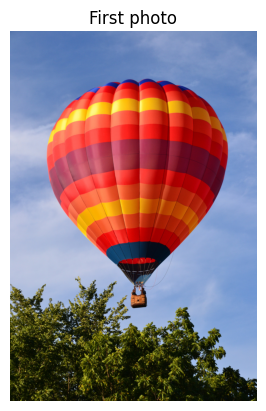

In [21]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA

image_raw = imread("photo.jpg")

print("Size of first photo:", image_raw.shape)

plt.imshow(image_raw)
plt.title("First photo")
plt.axis('off')
plt.show()



## STEP 2 Виведення чорно-білого зображення

Size of black-white photo: (1383, 922)


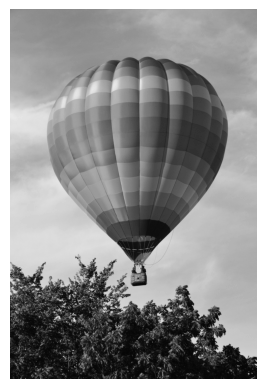

In [22]:
image_sum = image_raw.sum(axis=2)
image_bw = image_sum / image_sum.max()
print("Size of black-white photo:", image_bw.shape)


plt.imshow(image_bw, cmap='gray')
plt.title("")
plt.axis('off')
plt.show()

##  STEP 3 Застосування PCA

Кількість компонент для покриття 95% дисперсії: 56


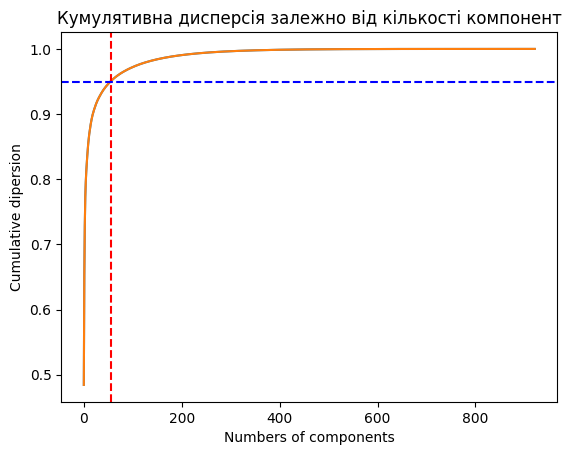

In [23]:
pca = PCA()
pca.fit(image_bw)

# Кумулятивна дисперсія
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Знаходження кількості компонент для покриття 95% дисперсії
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Кількість компонент для покриття 95% дисперсії: {n_components_95}")

# Графік кумулятивної дисперсії
plt.plot(cumulative_variance)
plt.xlabel("Numbers of components")
plt.ylabel("Сumulative dipersion")
plt.title("Кумулятивна дисперсія залежно від кількості компонент")


# Графік кумулятивної дисперсії
plt.plot(cumulative_variance)
plt.xlabel("Numbers of components")
plt.ylabel("Сumulative dipersion")
plt.title("Кумулятивна дисперсія залежно від кількості компонент")
plt.axvline(n_components_95, color='r', linestyle='--')
plt.axhline(y=0.95, color='b', linestyle='--')
plt.show()

## STEP 4 Реконструкція зображення з обмеженою кількістю компонент

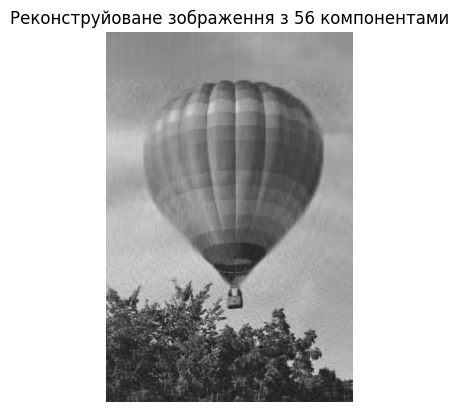

In [24]:
pca = PCA(n_components=n_components_95)
image_bw_pca = pca.fit_transform(image_bw)
image_bw_reconstructed = pca.inverse_transform(image_bw_pca)

# Відображення реконструйованого зображення
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.title(f"Реконструйоване зображення з {n_components_95} компонентами")
plt.axis('off')
plt.show()

## STEP 5 Функція для реконструкції зображення з заданою кількістю компонент

In [25]:
def reconstruct_image(image, n_components):
    pca = PCA(n_components=n_components)
    image_pca = pca.fit_transform(image)
    image_reconstructed = pca.inverse_transform(image_pca)
    return image_reconstructed

components_list = [5, 20, 50, n_components_95, 100, 200]

# Реконструкція та відображення зображень для різної кількості компонент

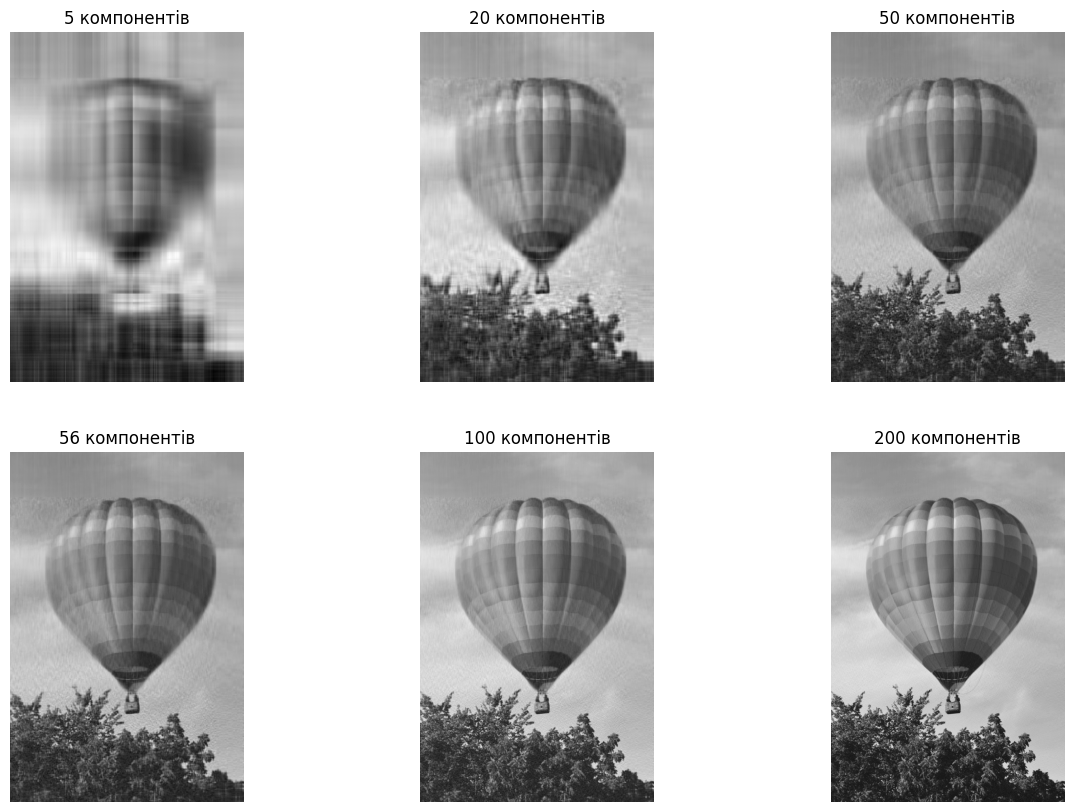

In [26]:
plt.figure(figsize=(15, 10))
for i, n_components in enumerate(components_list):
    plt.subplot(2, 3, i+1)
    image_reconstructed = reconstruct_image(image_bw, n_components)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f"{n_components} компонентів")
    plt.axis('off')

plt.show()